
# 📊 Census Data Analysis Project

This project involves exploratory data analysis (EDA) and preprocessing of a census dataset to understand key demographic patterns. 
The project demonstrates skills in data cleaning, visualisation, and basic analysis using **Python (Pandas, Matplotlib, Seaborn)**.

## Objectives:
- Understand the structure and quality of the census data
- Perform data cleaning and transformations
- Generate summary statistics and visual insights
- Prepare data for further statistical or machine learning applications


# CENSUS PROJECT

In [ ]:
# 📦 Importing essential libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## 🔄 Data Loading
Load the dataset into a pandas DataFrame.

In [ ]:
# Load the census data
df = pd.read_csv('census3_thurs.csv')  # Ensure the CSV file is in the same directory


# DATA CLEANING

## 🧹 Data Cleaning
Inspect the structure and completeness of the dataset.

In [ ]:
# Display summary information of the dataset
df.info()


In [4]:
# Count the number of missing values
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     659
Marital Status                   2557
Gender                              0
Occupation                          0
Infirmity                        9995
Religion                         5983
dtype: int64

# Cleaning the Age Column

In [5]:
# Check the unique Age values
df['Age'].unique()
# The age column contains inconsistent data types, and some blank enteries.

array(['50', '21', '58', '79', '62', '63', '35', '29', '45', '43', '54',
       '44', '52', '17', '16', '14', '8', '23', '1', '24', '38', '40',
       '41', '5', '2', '12', '9', '61', '26', '53', '42', '15', '13',
       '51', '22', '27', '49', '55', '18', '25', '19', '20', '34', '47',
       '39', '37', '30', '65', '70', '32', '28', '59', '57', '48', '10',
       '0', '71', '31', '11', '36', '4', '46', '60', '3', '56', '69',
       '72', '68', '67', '89', '91', '64', '76', '74', '81', '78', '83',
       '80', '73', '75', '33', '102', '66', '7', '6', '94', '82', '84',
       '77', ' ', '85', '86', '87', '88', '101', '104', '98', '100',
       '105', '92', '61.829716472932155', '58.829716472932155', '23.0',
       '19.0', '13.0', '95', '71.28039239185628', '24.999999999999993',
       '23.999999999999993', '19.999999999999993', '16.999999999999993',
       '103', '108', '90', '97', '99', '93', '96', '73.26500188710526',
       '75.26500188710526', '20.0', '17.0', '11.0', '111'], dtype=o

In [6]:
# Rows with blank entries
df[df['Age']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
756,15,Hawthorn Knolls,Nicola,Anderson,,Wife,Married,Female,Automotive engineer,NaN,Methodist
3389,209,Lightning Street,Duncan,Hammond,,Son,Divorced,Male,"Scientist, water quality",NaN,Christian


In [9]:
# calculate the mode age of wives
mode_age1 = df.loc[(df['Marital Status'] == 'Married') & (df['Relationship to Head of House'] == 'Wife'), 'Age'].mode()[0]

# Fill in the first blank Age with the mode age of the wives
df.loc[756, 'Age'] = mode_age1

# calculate the mode age of people who are divorced and sons
mode_age2 = df.loc[(df['Marital Status'] == 'Divorced') & (df['Relationship to Head of House'] == 'Son'), 'Age'].mode()[0]

# Fill in the second blank age with the mode value of people who are divorced and sons
df.loc[3389, 'Age'] = mode_age2

In [10]:
# Confirm our entries
df[df['Age']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [11]:
# Convert the Age column to integer type
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce').round().astype('int')

# Cleaning 'Relationship to Head of House' Column

In [12]:
# view dataframe containing missing values for the 'Relationship to Head of House' column
df[df['Relationship to Head of House'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
82,18,Bletchleyrow Street,Sara,Singh,62,NaN,Single,Female,Theatre manager,NaN,Christian
83,18,Bletchleyrow Street,Patricia,Bull,40,NaN,Single,Female,Physiological scientist,NaN,Christian
84,18,Bletchleyrow Street,Vincent,Hilton,47,NaN,Single,Male,"Physicist, medical",NaN,Catholic
85,18,Bletchleyrow Street,James,King,25,NaN,Widowed,Male,Hospital pharmacist,NaN,NaN
221,22,Andrews Avenue,Gary,Davies,41,NaN,Single,Male,"Presenter, broadcasting",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9964,26,Brightwater Street,Neil,Glover,42,NaN,Single,Male,Best boy,NaN,Catholic
10057,1,Baker Spire,Neil,Ali,40,NaN,Single,Male,Unemployed,NaN,NaN
10058,1,Baker Spire,Joanne,Clayton,47,NaN,Single,Female,Clothing/textile technologist,NaN,Methodist
10059,1,Baker Spire,Duncan,Nicholson,47,NaN,Single,Male,Fast food restaurant manager,NaN,Catholic


In [13]:
# Fill the 'Relationship to Head of House' column to 'Head' for all rows where age is greater than or equal t0 18
df.loc[(df['Age'] >= 18) & (df['Relationship to Head of House'].isna()), 'Relationship to Head of House'] = 'Head'

# Fill the 'Relationship to Head of House' column to 'Son' for all rows where gender is male and age is less than 18
df.loc[(df['Gender'] == 'Male') & (df['Relationship to Head of House'].isna()), 'Relationship to Head of House'] = 'Son'

# Fill the 'Relationship to Head of House' column to 'Daughter' for all rows where gender is female and age is less than 18
df.loc[(df['Gender'] == 'Female') & (df['Relationship to Head of House'].isna()), 'Relationship to Head of House'] = 'Daughter'

In [14]:
df['Relationship to Head of House'].isna().sum()

0

# Cleaning 'Marital Status' column

In [15]:
# check the unique 'marital status' values
df['Marital Status'].unique()

array(['Single', 'Married', 'Widowed', nan, 'Divorced'], dtype=object)

In [16]:
# Filter rows where age is less than 18 and marital status is 'single', 'Married', "Divorced', or 'Widowed'
df[(df['Age'] < 18) & (df['Marital Status'].isin(['Single', 'Married', 'Widowed','Divorced']))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
126,30,Bletchleyrow Street,Dominic,Stephenson,17,Head,Single,Male,Unemployed,NaN,NaN
982,6,Warren Bypass,Sian,Walker,16,Head,Married,Female,Student,NaN,NaN
1781,25,Roberts Divide,Jennifer,Campbell,17,Head,Single,Female,Student,NaN,NaN
5773,115,September Street,Barbara,Clark,17,Head,Single,Female,Student,NaN,NaN


In [17]:
# fill the marital status to nan for rows where age is less than 18
df.loc[df['Age']< 18, 'Marital Status'] = 'Minor'

In [18]:
# Filter rows where age is less than 18 and marital status is 'single', 'Married', "Divorced', or 'Widowed'
df[(df['Age'] < 18) & (df['Marital Status'].isin(['Single', 'Married', 'Widowed','Divorced']))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Cleaning 'Occupation' Column

In [19]:
# check the unique 'occupation' values
df['Occupation'].unique()

array(['Media planner', 'University Student', 'Professor Emeritus', ...,
       'Retired Health visitor', 'Retired Advertising copywriter',
       'Retired Chartered management accountant'], dtype=object)

In [20]:
# Rows with blank occupation
df[df['Occupation']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5696,88,September Street,Emma,Doyle,41,Daughter,Single,Female,,NaN,Methodist


In [21]:
# Replace the blank with "Unknown"
df.loc[5696, 'Occupation'] = 'Unknown'

In [22]:
# Confirm entries
df[df['Occupation']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Cleaning 'Religion' Column

In [23]:
# check the unique 'religion' values
df['Religion'].unique()
# There are both nan values and blank entries in the religion column. We will handle them separately.
# There are also false religions, such as 'Housekeeper', 'Jeremism', and 'Nope'.

array(['Christian', 'Muslim', nan, 'Catholic', 'Methodist', 'Sikh',
       'Jewish', 'Undecided', 'Buddist', 'Bahai', 'Housekeeper',
       'Orthodoxy', 'Jeremism', 'Nope', ' '], dtype=object)

In [24]:
# Filter rows with blank entries in the religion column
df[df['Religion']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9190,11,Wheeler Light,Glenn,Wong,15,Son,Minor,Male,Student,NaN,


In [25]:
# Filter rows where house number is 11 and street is 'wheeler light'.
df[(df['House Number'] == 11) & (df['Street'].isin(['Wheeler Light']))]

# We see that the head of house of this particular individual with a blank is a catholic, 
# we will fill in catholic in the blank.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9188,11,Wheeler Light,Josephine,Wong,43,Head,Single,Female,Film/video editor,NaN,Catholic
9189,11,Wheeler Light,Jade,Wong,17,Daughter,Minor,Female,Student,NaN,NaN
9190,11,Wheeler Light,Glenn,Wong,15,Son,Minor,Male,Student,NaN,
9191,11,Wheeler Light,Terry,Wong,13,Son,Minor,Male,Student,NaN,NaN


In [26]:
# Fill in the blank entry with the religion of the head of the individual's house
df.loc[9190, 'Religion'] = 'Catholic'

In [27]:
# confirming the entry by filtering blank entries again
df[df['Religion']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [28]:
# We will replace the nan values using this function
# Define a function to fill in missing religion values.
def fill_missing_religion(row, group):
    # Check if the religion value for current row is missing
    if pd.isna(row['Religion']):
        # Get the group of rows with same house number and street name
        house_group = group.get_group((row['House Number'], row['Street']))
        # Get the unique non-null religion values in the group
        religions = house_group['Religion'].dropna().unique()
        # if thersisonly one unique religion, it will return it, otherwise, return 'Undecided' 
        if len(religions) == 1:
            return religions[0]
        else:
            return 'Undecided'
    # if the religion value is not missing, return it as it is        
    else:
        return row['Religion']
# Group the data by House Number and Street Name
group = df.groupby(['House Number', 'Street'])

# apply the fill_missing_religion function to fill missing religion values
df['Religion'] = df.apply(lambda row: fill_missing_religion(row, group), axis = 1)

In [29]:
# We define another function to fix the false religions. The false religions will be eliminated and their values added to 'Undecided'.
# Remove False Religions (Housekeeper, Jeremism, and Nope) and Add their Values to Undecided (already existing religion)
def categorize_religion(religion):
    """
    Categorizes religions based on specific keywords or phrases.
    """
    if pd.isnull(religion):
        # If religion is missing, return None
        return None
    # Convert religion to lowercase for case-insensitive matching
    religion = religion.lower()
    
    if "christian" in religion:
        return "Christian"
    elif "muslim" in religion:
        return "Muslim"
    elif "catholic" in religion:
        return "Catholic"
    elif "methodist" in religion:
        return "Methodist"
    elif "sikh" in religion:
        return "Sikh"
    elif "jewish" in religion:
        return "Jewish"
    elif "buddist" in religion:
        return "Buddist"
    elif "bahai" in religion:
        return "Bahai"
    elif "orthodoxy" in religion:
        return "Orthodoxy"
    else:
        return "Undecided"
# Apply the categorize_religion function to the religion column
df['Religion'] = df['Religion'].apply(categorize_religion)

In [30]:
# Check the unique values again to be sure our function is able to fix the problem
df['Religion'].unique()

array(['Christian', 'Muslim', 'Catholic', 'Undecided', 'Methodist',
       'Sikh', 'Jewish', 'Buddist', 'Bahai', 'Orthodoxy'], dtype=object)

# Cleaning 'Infirmity' Column

In [31]:
# check the unique values of the 'Infirmity' column
df['Infirmity'].unique()
# There are a lot of blank entries and nan values. Both blank entries and nan values are assumed to be people with no infirmity.

array([nan, 'Physical Disability', ' ', 'Deaf', 'Unknown Infection',
       'Disabled', 'Blind', 'Mental Disability'], dtype=object)

In [32]:
# Filtering rows with blank entries in the infirmity column
df[df['Infirmity']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
702,5,Lynch Spurs,Hollie,Rees,16,Granddaughter,Minor,Female,Student,,Christian
1758,17,Roberts Divide,Victoria,Francis,45,Head,Single,Female,Art gallery manager,,Undecided
1794,28,Roberts Divide,Leon,Conway,59,Husband,Married,Male,Learning disability nurse,,Christian
2243,41,Lightning Street,Iain,Johnson,32,Son,Single,Male,"Surveyor, insurance",,Christian
2978,148,Lightning Street,Molly,Lambert,26,Daughter,Single,Female,Radio broadcast assistant,,Christian
3646,6,Plymouth Drive,Lewis,Akhtar,29,Head,Single,Male,PhD Student,,Buddist
4000,18,Shepherd Cove,Lynda,Bruce,29,Daughter,Single,Female,Facilities manager,,Catholic
4675,131,Shepherd Cove,Rita,Akhtar,10,Granddaughter,Minor,Female,Student,,Undecided
4821,153,Shepherd Cove,Robin,Fleming,22,Lodger,Divorced,Male,University Student,,Undecided
7789,22,Khan Keys,Sharon,Jackson,59,Head,Married,Female,Clothing/textile technologist,,Undecided


In [33]:
# Filling blank entries with 'nan', implying that those individuals are clean (with no infirmity)
df.loc[df['Infirmity'] == ' ', 'Infirmity'] = np.nan

In [34]:
# Filtering blanks again to be sure our treatment was effective
df[df['Infirmity']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#  DATA ANALYSIS

In [35]:
# Create a new column for 'Age Group' in the data frame. This will store the grouped ages of individuals in the town.
# And obtain the 'male' and 'female' counts for each age group. This will assist us with constructing the age pyramid
# Define age group bins 
age_bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, float('inf')]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

# Convert age to age group
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by age group and gender, then sum the counts
grouped_df = df.groupby(['AgeGroup', 'Gender'], observed=True)['Age'].count().reset_index() #

# Pivot the table to have age groups as rows and genders as columns
pivot_df = grouped_df.pivot(index='AgeGroup', columns='Gender',values='Age') 

# Rename columns for clarity
pivot_df.rename(columns={'Male': 'MaleCount', 'Female': 'FemaleCount'}, inplace=True)

# Show the 
pivot_df


Gender,FemaleCount,MaleCount
AgeGroup,,
0-4,255,265
5-9,362,359
10-14,376,379
15-19,394,394
20-24,400,377
25-29,409,364
30-34,390,323
35-39,475,374
40-44,450,374


In [36]:
# Change the male count to negative. This is to enable us place the two genders side by side on the pyramid.
pivot_df['MaleCount'] = pivot_df['MaleCount'] *-1
pivot_df

Gender,FemaleCount,MaleCount
AgeGroup,,
0-4,255,-265
5-9,362,-359
10-14,376,-379
15-19,394,-394
20-24,400,-377
25-29,409,-364
30-34,390,-323
35-39,475,-374
40-44,450,-374


In [37]:
# Create an age class to serve as an order for the pyramid
AgeClass = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', 
'50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4',]

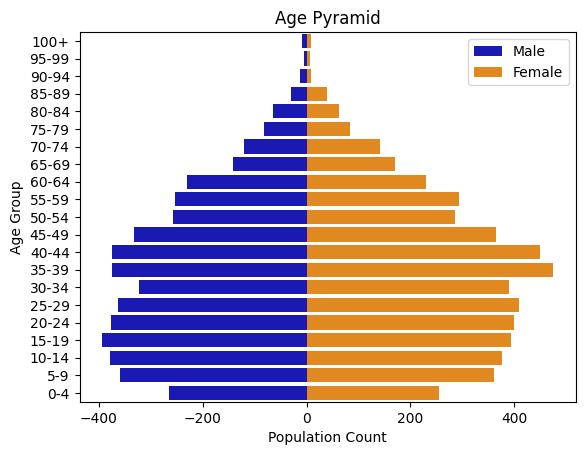

In [38]:
# Construct the age pyramid
age_pyramid = sns.barplot(x='MaleCount', y='AgeGroup', data=pivot_df,
order=AgeClass, color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x='FemaleCount', y='AgeGroup', data=pivot_df,
order=AgeClass, color=('darkorange'), label='Female')
age_pyramid.legend()
plt.title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

# Save the plot as an image file
plt.savefig('age_pyramid_plot.png')

# Show the plot
plt.show()

In [40]:
# Total Population
total_population = df.shape[0]

# Total males and females
total_males = df[df['Gender']=='Male'].shape[0]
total_females = df[df['Gender']=='Female'].shape[0]

# Percentage of males and females in the population
male_percent = (total_males/total_population)*100
female_percent = (total_females/total_population)*100

# Print out the results
print('Total Population:', total_population)
print('Total Males:', total_males)
print('Total Females:', total_females)
print(f"Percentage Males: {male_percent:.2f}%")
print(f"Percentage Females: {female_percent:.2f}%")

Total Population: 10083
Total Males: 4816
Total Females: 5267
Percentage Males: 47.76%
Percentage Females: 52.24%


In [41]:
# Infants aged zero (0)
infants = df[df['Age'] == 0].shape[0]

# Define age ranges 
lower_age = 25
upper_age = 29

# Calculate the number of live births in the specified age range
num_live_births = infants

# Calculate the crude birth rate (CBR) per 1000
CBR = round((num_live_births / total_population) * 1000) 

# Display Results
print('The number of live births is: ', infants)
print(f'The Birth rate is {CBR} per 1000')

The number of live births is:  127
The Birth rate is 13 per 1000


In [42]:
# Filter individuals within 66-70 and 71-75 age groups
aged_66_70 = df[(df["Age"] >= 66) & (df["Age"] <= 70)]
aged_71_75 = df[(df["Age"] >= 71) & (df["Age"] <= 75)]

# Number of deaths within 66-70 and 71-75 age groups
Num_of_deaths = aged_66_70.shape[0] - aged_71_75.shape[0]

# Total number of people in the 66-70 and 71-75 age groups
total_pop_agegroup = aged_66_70.shape[0] + aged_71_75.shape[0]

# Death rate per 1000 per annum within the 66-70 and 71-75 age groups
death_rate1 = round(((Num_of_deaths/total_pop_agegroup)*1000)/5)

# Filter individuals within 76-80 and 81-85 age groups
aged_76_80 = df[(df["Age"] >= 76) & (df["Age"] <= 80)]
aged_81_85 = df[(df["Age"] >= 81) & (df["Age"] <= 85)]

# Number of deaths within the 76-80 and 81-85 age groups
Num_of_deaths = aged_76_80.shape[0] - aged_81_85.shape[0]

# Total number of people in the 76-80 and 81-85 age groups
total_pop_agegroup = aged_76_80.shape[0] + aged_81_85.shape[0]

# Death rate per 1000 per annum within the 76-80 and 81-85 age groups
death_rate2 = round(((Num_of_deaths/total_pop_agegroup)*1000)/5)

# Filter individuals within 86-90 and 91-95 age groups
aged_86_90 = df[(df["Age"] >= 86) & (df["Age"] <= 90)]
aged_91_95 = df[(df["Age"] >= 91) & (df["Age"] <= 95)]

# Number of deaths within the 86-90 and 91-95 age groups
Num_of_deaths = aged_86_90.shape[0] - aged_91_95.shape[0]

# Total number of people in the 86-90 and 91-95 age groups
total_pop_agegroup = aged_86_90.shape[0] + aged_91_95.shape[0]

# Death rate per 1000 per annum within the 86-90 and 91-95 age groups
death_rate3 = round(((Num_of_deaths/total_pop_agegroup)*1000)/5)

# Filter individuals within 96-100 and 101-105 age groups
aged_96_100 = df[(df["Age"] >= 96) & (df["Age"] <= 100)]
aged_101_105 = df[(df["Age"] >= 101) & (df["Age"] <= 105)]

# Number of deaths within the 96-100 and 101-105 age groups
Num_of_deaths = aged_96_100.shape[0] - aged_101_105.shape[0]  

# Total number of people in the 96-100 and 101-105 age groups
total_pop_agegroup = aged_96_100.shape[0] + aged_101_105.shape[0]

# Death rate per 1000 per annum within the 96-100 and 101-105 age groups
death_rate4 = round(((Num_of_deaths/total_pop_agegroup)*1000)/5)

# Filter individuals within 106-110 and 111-115 age groups
aged_106_110 = df[(df["Age"] >= 106) & (df["Age"] <= 110)]
aged_111_115 = df[(df["Age"] >= 111) & (df["Age"] <= 115)]

# Number of deaths within the 106-110 and 111-115 age groups
Num_of_deaths = aged_106_110.shape[0] - aged_111_115.shape[0]

# Total number of people in the 106-110 and 111-115 age groups
total_pop_agegroup = aged_106_110.shape[0] + aged_111_115.shape[0]

# Death rate per 1000 per annum within the 106-110 and 111-115 age groups
death_rate5 = round(((Num_of_deaths/total_pop_agegroup)*1000)/5)

# crude death rate of the town
crude_death_rate = death_rate1 + death_rate2 + death_rate3 + death_rate4 + death_rate5

# Display output
print('Crude Death Rate per 1000:', crude_death_rate)

Crude Death Rate per 1000: 198


In [43]:
# Natural Population Increase
natural_increase = CBR - crude_death_rate

print('Rate of Natural Increase per 1000:', natural_increase)

Rate of Natural Increase per 1000: -185


In [44]:
# IMMIGRANTS: Visitors and lodgers who are actively employed or unemployed or students or university students are assumed to be immigrants
visitors_lodgers = df[(df['Relationship to Head of House'].isin(['Visitor', 'Lodger']))] 
visitors_lodgers

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup
13,1,Bletchleyrow Street,Bernard,Abbott,54,Lodger,Single,Male,"Pharmacist, community",NaN,Undecided,50-54
22,3,Bletchleyrow Street,Jack,Gardner,24,Lodger,Single,Male,Chief Financial Officer,NaN,Methodist,20-24
23,3,Bletchleyrow Street,Josephine,Sharp,38,Visitor,Single,Female,Probation officer,NaN,Christian,35-39
36,7,Bletchleyrow Street,Elliott,Phillips,43,Lodger,Single,Male,"Civil engineer, contracting",NaN,Undecided,40-44
37,7,Bletchleyrow Street,Kieran,Allen,61,Lodger,Single,Male,Investment analyst,NaN,Christian,60-64
...,...,...,...,...,...,...,...,...,...,...,...,...
10024,1,Burgess Obervatory,Billy,Williams,29,Lodger,Single,Male,Materials engineer,NaN,Undecided,25-29
10025,1,Burgess Obervatory,Martin,Ferguson,60,Lodger,Single,Male,Unemployed,NaN,Undecided,60-64
10075,1,Canterbury Factory,Diana,Davies,45,Lodger,Single,Female,"Therapist, art",NaN,Christian,45-49
10076,1,Canterbury Factory,Andrea,Perry,37,Lodger,Single,Female,"Education officer, museum",NaN,Christian,35-39


In [45]:
# EMIGRANTS: Divorcees who are neither lodgers nor visitors are possible assumed to be emigrants.
divorced_not_lodgers_or_visitors = df[(df['Marital Status'] == 'Divorced') & (~df['Relationship to Head of House'].isin(['Visitor', 'Lodger']))]
divorced_not_lodgers_or_visitors

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup
20,3,Bletchleyrow Street,June,Webb,23,Head,Divorced,Female,"Lecturer, higher education",NaN,Undecided,20-24
34,7,Bletchleyrow Street,Jenna,Young,26,Head,Divorced,Female,Materials engineer,NaN,Muslim,25-29
62,14,Bletchleyrow Street,Claire,Johnson,55,Head,Divorced,Female,Control and instrumentation engineer,NaN,Undecided,55-59
69,15,Bletchleyrow Street,Suzanne,Smith,25,Daughter,Divorced,Female,Race relations officer,NaN,Catholic,25-29
77,17,Bletchleyrow Street,Connor,Brooks,44,Head,Divorced,Male,Unemployed,NaN,Christian,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...
10027,1,Johnson Castle,Lauren,Hughes,33,Head,Divorced,Female,Police officer,NaN,Catholic,30-34
10040,1,Manchester Spire,Anne,Patel-Kelly,64,Daughter,Divorced,Female,Engineering geologist,NaN,Christian,60-64
10045,1,Manchester Spire,Jack,Patel-Kelly,56,Son,Divorced,Male,"Psychologist, clinical",NaN,Christian,55-59
10046,1,Manchester Spire,Lewis,Patel-Kelly,53,Son,Divorced,Male,"Presenter, broadcasting",NaN,Christian,50-54


In [46]:
# COMPUTE THE MIGRATION STATISTICS
# Number of immigrants and emigrants
immigrants = df[(df['Relationship to Head of House'].isin(['Visitor', 'Lodger']))].shape[0] 
emigrants = df[(df['Marital Status'] == 'Divorced') & (~df['Relationship to Head of House'].isin(['Visitor', 'Lodger']))].shape[0]

#Immigration and emigration rate
immigration_rate = (immigrants/total_population) * 1000
emigration_rate = (emigrants/total_population) * 1000

# Net Migration
net_migration = immigration_rate - emigration_rate

#Print the results
print('Total Immigrants:', immigrants)
print('Total Emigrants:', emigrants)
print(f"The Immigration rate is: {immigration_rate:.0f} per 1000")
print(f"The Emigration rate is: {emigration_rate:.0f} per 1000")
print(f"The Net Migration is: {net_migration:.0f} per 1000")

Total Immigrants: 592
Total Emigrants: 839
The Immigration rate is: 59 per 1000
The Emigration rate is: 83 per 1000
The Net Migration is: -24 per 1000


In [47]:
# Population growth rate
pop_change = net_migration + natural_increase # population change is the sum of net migration and natural increase

# Population Growth
pop_growth_rate = (pop_change/total_population) * 100

print(f"The Estimated Population Growth Rate per 1000 is: {pop_growth_rate:.2f}%")

The Estimated Population Growth Rate per 1000 is: -2.08%


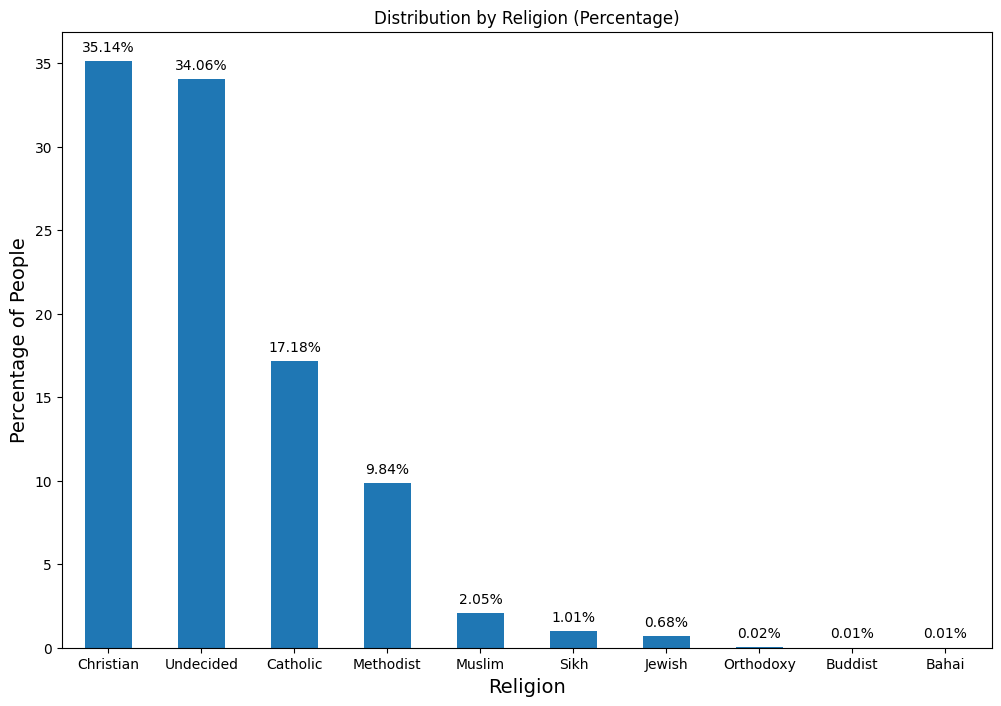

In [48]:
# WE WILL VISUALISE THE PERCENTAGES OF PEOPLE IN THE TOWN BY THEIR RELIGION
# Calculate the percentage of each religion
religion_percentages = (df['Religion'].value_counts() / len(df)) * 100

# Plot the religion affiliations
bar_plot = religion_percentages.plot(kind='bar', title='Distribution by Religion (Percentage)', figsize=(12, 8))
bar_plot.set_ylabel('Percentage of People',  size = 14)
plt.xlabel('Religion', size = 14)
plt.xticks(rotation=0)
# Add percentage labels to the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot as an image file
plt.savefig('Distribution by Religion.png')

# Show the plot
plt.show()


In [49]:
# Extract the number of people who practice a religion
religion = df[df['Religion'] != 'Undecided']

print('The total number of people who practice a religion:', religion.shape[0])

The total number of people who practice a religion: 6649


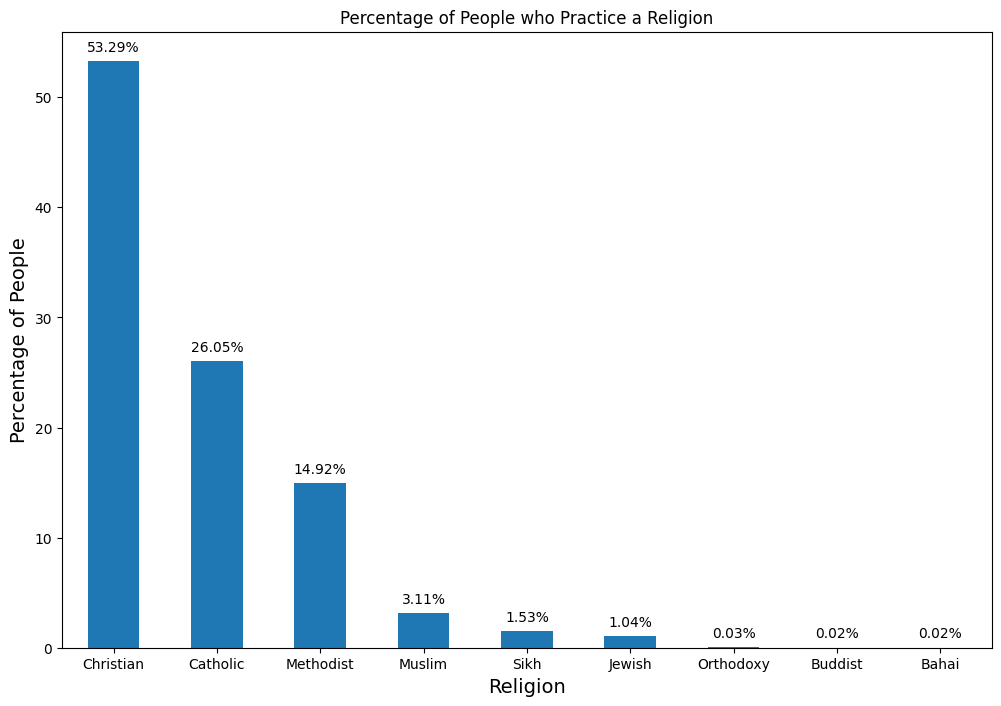

In [50]:
# Calculate the percentage of each religion
religion_percent = (religion['Religion'].value_counts() / len(religion)) * 100

# Construct a bar chart using the percentage values
bar_plot = religion_percent.plot(kind='bar', title='Percentage of People who Practice a Religion', figsize=(12, 8))
bar_plot.set_ylabel('Percentage of People', size = 14)
plt.xlabel('Religion', size = 14)
plt.xticks(rotation=0)
# Add percentage labels to the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot as an image file
plt.savefig('Distribution of Poeple Practicing Religion.png')

# Show the plot
plt.show()


In [51]:
# Number of Persons without any Infirmity
no_infirmity = df[~df['Infirmity'].isin(['Physical Disability', 'Deaf', 'Unknown Infection', 'Disabled', 'Blind', 'Mental Disability'])]
num_of_no_infirmity = no_infirmity.shape[0]

# Total Population
total_population = df.shape[0]

# Percentage of those without any infirmity
percent_clean = (num_of_no_infirmity/total_population) * 100

#  Percentage of those with an infirmity
percent_dirty = 100 - percent_clean

# Show output
print(f'The percentage of Persons without any Infirmity: {percent_clean:.2f}%')
print(f'The percentage of Persons with an Infirmity: {percent_dirty:.2f}%')

The percentage of Persons without any Infirmity: 99.26%
The percentage of Persons with an Infirmity: 0.74%


In [52]:
# Number of married people in the town
married_people = df[df['Marital Status'] == 'Married'].shape[0]

# Total population of the town
total_population = df.shape[0]

# percentage of married people
marriage_rate = (married_people/total_population) * 100

print("Number of married people in the town: ", married_people)
print(f"The mariage rate in the town is: {marriage_rate:.2f}.%")

Number of married people in the town:  2551
The mariage rate in the town is: 25.30.%


In [53]:
# Rate of divorce in the town
num_of_divorcees = df[(df['Marital Status'] == 'Divorced')].shape[0]

# Total population of the town
total_population = df.shape[0]

# Percentage of divecees
Divorce_rate = (num_of_divorcees/total_population) * 100

print("Number of divorced people in the town: ", num_of_divorcees)
print(f"The divorce rate in the town is: {Divorce_rate:.2f}.%")

Number of divorced people in the town:  972
The divorce rate in the town is: 9.64.%


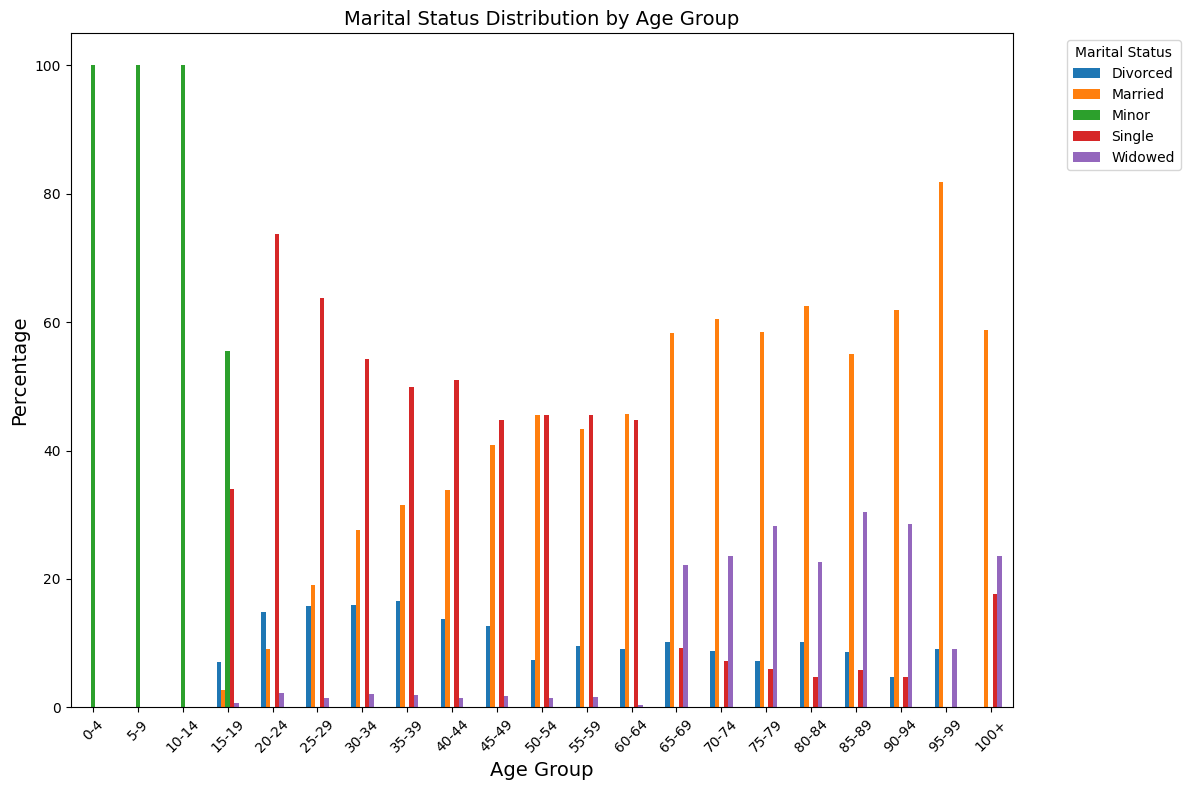

In [54]:
# Group by AgeGroup and Marital status, then calculate the percentage
grouped = df.groupby(['AgeGroup', 'Marital Status'], observed=True).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped_percentage.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title("Marital Status Distribution by Age Group", size = 14)
plt.xlabel("Age Group", size = 14)
plt.ylabel("Percentage", size = 14)
plt.xticks(rotation=45)
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Marital Status Distribution by Age Group.png')

plt.show()

In [55]:
# Total number of houses in the town
total_num_of_houses = df.groupby('Street')['House Number'].nunique().sum()
total_num_of_houses

3106

In [56]:
# Group by House Number and Street, and count the number of occupants. This will help us to visualise the number of occupants per home
occupancy_counts = df.groupby(["House Number", "Street"]).size().reset_index(name="Occupants Count")
occupancy_counts

,House Number,Street,Occupants Count
0,1,Abbott Mall,4
1,1,Acorn Road,4
2,1,Adams Ports,5
3,1,Ahmed Oval,3
4,1,Andrews Avenue,2
...,...,...,...
3101,225,Lightning Street,4
3102,226,Lightning Street,5
3103,227,Lightning Street,8
3104,228,Lightning Street,5


In [57]:
# Median occupancy
df.groupby(["House Number", "Street"]).size().median()

3.0

In [58]:
# Mean occupancy
df.groupby(["House Number", "Street"]).size().mean()

3.2462974887314875

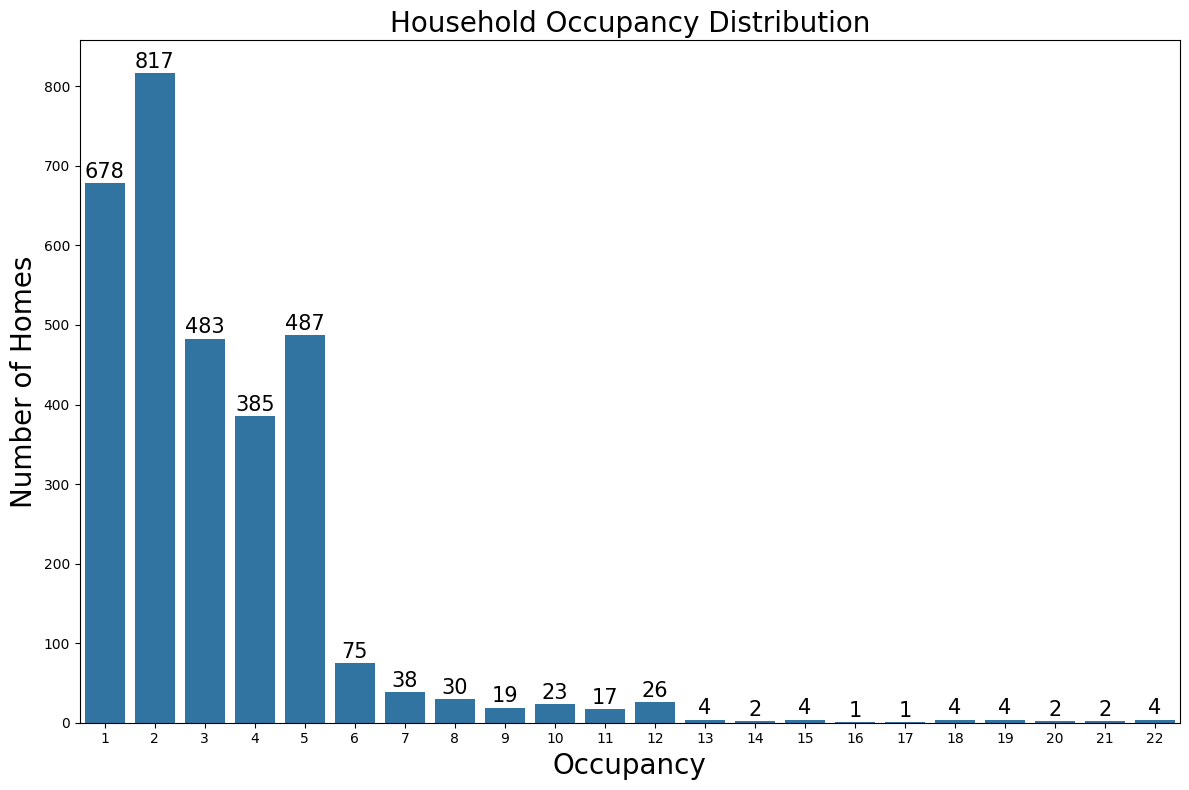

In [59]:
# Visualise
# Count the occurrences of each unique value in the "Occupants Count" column
occupant_counts = occupancy_counts['Occupants Count'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot1 = sns.barplot(x=occupant_counts.index, y=occupant_counts, errorbar=None) 

for bar in plot1.patches:
    plot1.annotate(format(bar.get_height(),'.0f'), (bar.get_x() + bar.get_width()/2, 
                                                    bar.get_height()), ha='center', va='center', size=15, xytext=(0,8), textcoords='offset points')


plt.xlabel("Occupancy", size=20)
plt.ylabel("Number of Homes", size=20)
plt.title("Household Occupancy Distribution", size = 20)
#plt.grid(axis="y")  # Add grid lines for better readability

# Show the plot
plt.tight_layout()  # Ensures proper spacing

# Save the plot as an image file
plt.savefig('Household Occupancy Distribution.png')

plt.show()

In [60]:
# Group the occupancy by the median age of occupants
median_age = df.groupby(["House Number", "Street"])["Age"].median().reset_index(name="Median Age")
median_age

,House Number,Street,Median Age
0,1,Abbott Mall,30.5
1,1,Acorn Road,7.0
2,1,Adams Ports,39.0
3,1,Ahmed Oval,35.0
4,1,Andrews Avenue,25.0
...,...,...,...
3101,225,Lightning Street,33.5
3102,226,Lightning Street,32.0
3103,227,Lightning Street,24.5
3104,228,Lightning Street,28.0


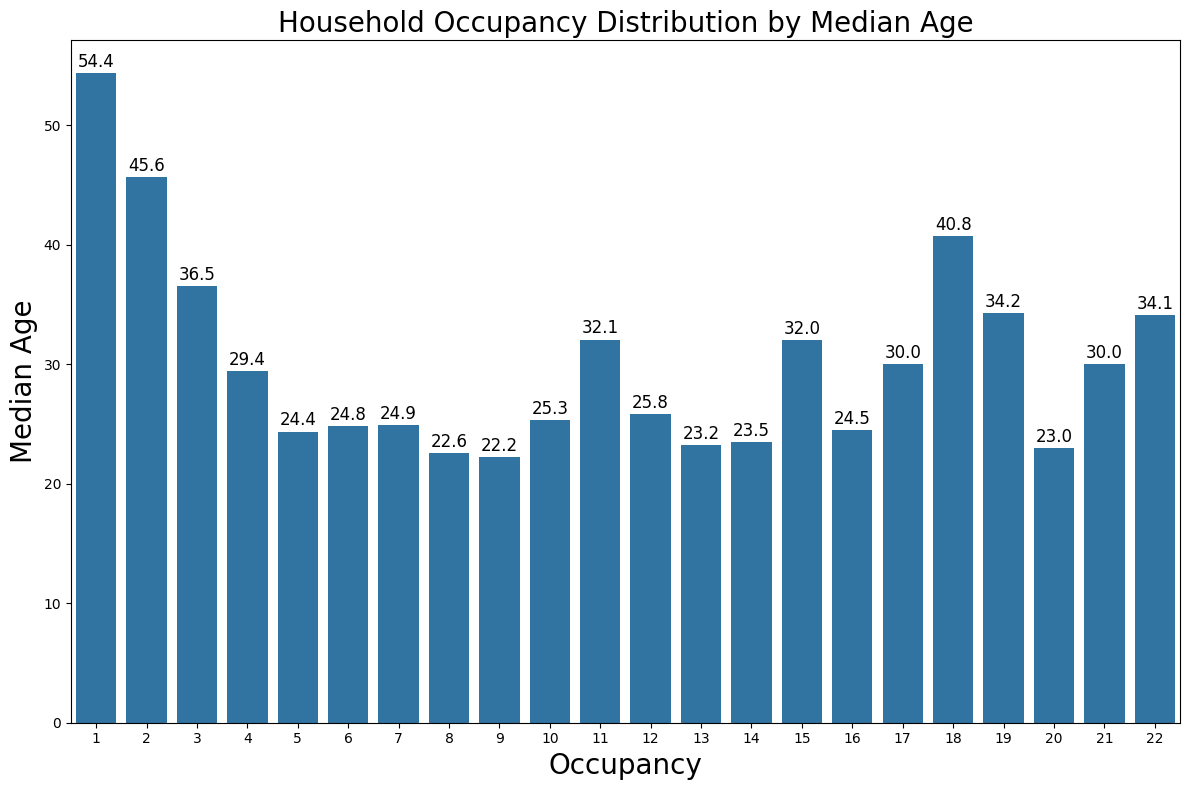

In [61]:
# visualise the occupancy by median age
# Plot a bar graph of occupancy by median age
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot2 = sns.barplot(x=occupancy_counts["Occupants Count"], y=median_age["Median Age"], errorbar=None)

for bar in plot2.patches:
    plot2.annotate(format(bar.get_height(),'.1f'), (bar.get_x() + bar.get_width()/2, 
                                                    bar.get_height()), ha='center', va='center', size=12, xytext=(0,8), textcoords='offset points')


plt.xlabel("Occupancy", size=20)
plt.ylabel("Median Age", size=20)
plt.title("Household Occupancy Distribution by Median Age", size = 20)
#plt.grid(axis="y")  # Add grid lines for better readability

# Show the plot
plt.tight_layout()  # Ensures proper spacing

# Save the plot as an image file
plt.savefig('Household Occupancy Distribution by Median Age.png')

# show the plot
plt.show()

In [62]:
# We will group the occupations into categories
def categorize_occupation(occupation):
    """
    Categorizes occupations based on specific keywords or phrases.
    """
    if pd.isnull(occupation):
        # If occupation is missing, return None
        return None
    # Convert occupation to lowercase for case-insensitive matching
    occupation = occupation.lower()
    
    if "unemployed" in occupation:
        return "Unemployed"
    elif "retired" in occupation:
        return "Retired"
    elif "student" in occupation:
        if "university" in occupation or "phd student" in occupation:
            return "University/PhD Student"
        else:
            return "Student"
    elif "child" in occupation or "minor" in occupation:
        return "Child"
    else:
        return "Employed"
# Apply the categorize_occupation function to create a new column
df['Occupation Category'] = df['Occupation'].apply(categorize_occupation)

In [63]:
# check the unique values to see if the function worked
df['Occupation Category'].unique()

array(['Employed', 'University/PhD Student', 'Retired', 'Student',
       'Child', 'Unemployed'], dtype=object)

In [64]:
# Get the number of individuals for each group
# Number of people in each occupation category
df['Occupation Category'].value_counts().reset_index(name='Count')

,Occupation Category,Count
0,Employed,5286
1,Student,2040
2,Retired,753
3,Child,674
4,University/PhD Student,670
5,Unemployed,660


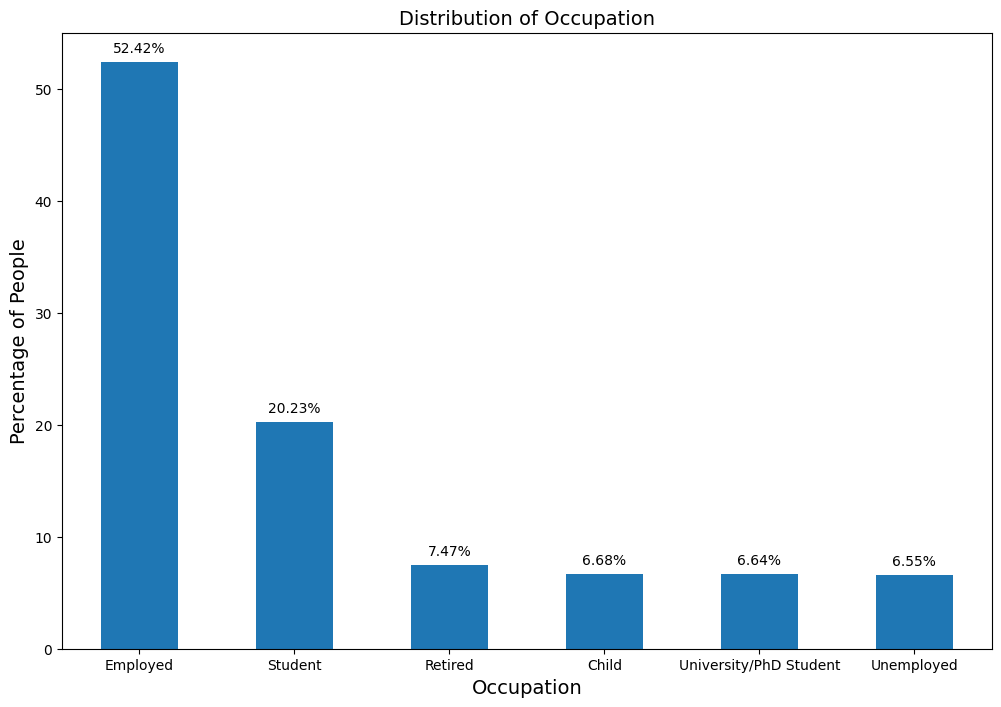

In [65]:
# Visualise the distribution of the occupation
# Calculate the percentage of each workforce
workforce_percentages = (df['Occupation Category'].value_counts() / len(df)) * 100

# Construct a bar chart using the percentage values
bar_plot = workforce_percentages.plot(kind='bar', figsize=(12, 8))
bar_plot.set_ylabel('Percentage of People', size = 14)
plt.title('Distribution of Occupation',size = 14)
plt.xlabel('Occupation', size = 14)
plt.xticks(rotation=0)
# Add percentage labels to the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot as an image file
plt.savefig('Occupation Category.png')

# show plot
plt.show()

In [66]:
# EXPLORING UNEMPLOYMENT IN THE TOWN
# Unemployed people by age group
age_group_counts = df[df['Occupation Category'] == 'Unemployed'].groupby('AgeGroup', observed=True).size().reset_index(name='Count')

# Drop age groups with a count of zero
age_group_counts = age_group_counts[age_group_counts['Count'] > 0]
age_group_counts

,AgeGroup,Count
0,15-19,4
1,20-24,30
2,25-29,85
3,30-34,79
4,35-39,89
5,40-44,104
6,45-49,70
7,50-54,53
8,55-59,45
9,60-64,51


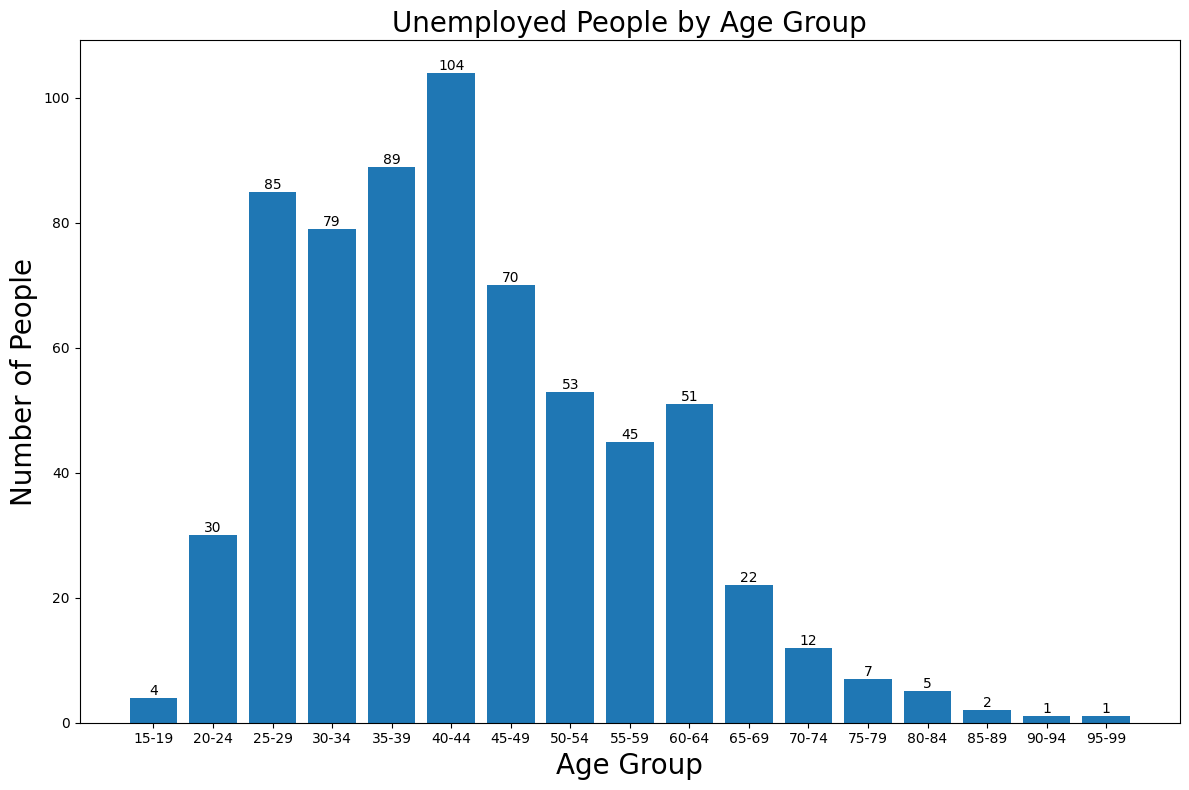

In [67]:
# Visualise unemployed people by age group
# Plotting Number of unemployed people by age group
plt.figure(figsize=(12, 8))
plot3 = plt.bar(age_group_counts["AgeGroup"], age_group_counts["Count"])

# Annotate each bar with the count
for bar in plot3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0, yval, ha='center', va='bottom')

plt.title('Unemployed People by Age Group', size = 20)
plt.xlabel('Age Group', size = 20)
plt.ylabel('Number of People', size = 20)
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Unemployed People by Age Group.png')

# show plot
plt.show()

In [68]:
# OCCUPATION STATISTICS
# Unemployment Rate of the town
num_of_unemployed = df[df['Occupation Category'] == 'Unemployed'].shape[0]
num_of_employed = df[df['Occupation Category'] == 'Employed'].shape[0]

# Calculate the labor force
labour_force = num_of_employed + num_of_unemployed

# Calculate the unemployment rate
unemployment_rate = (num_of_unemployed / labour_force) * 100

# Display the result
print('Number of Employed people:', num_of_employed)
print('Number of Unemployed people:', num_of_unemployed)
print(f"Unemployment rate of the town: {unemployment_rate:.2f}%")

Number of Employed people: 5286
Number of Unemployed people: 660
Unemployment rate of the town: 11.10%


In [69]:
# WE DEFINE A FUNCTION TO CALCULATE THE UNEMPLOYMENT RATE BY AGE GROUP
# Calculate the unemployment rates across age groups
def compute_unemployment_rates(df):
    """
    Computes unemployment rates for each age group based on 'occupation category'.

    """
    # Initialize an empty list to store the results
    unemployment_rates = []

    # Get unique age groups
    age_groups = df['AgeGroup'].unique()

    # Loop through each age group
    for age_group in age_groups:
        # Filter dataframe by age group
        age_group_df = df[df['AgeGroup'] == age_group]

        # Calculate the number of employed and unemployed individuals
        employed_count = age_group_df[age_group_df['Occupation Category'] == 'Employed'].shape[0]
        unemployed_count = age_group_df[age_group_df['Occupation Category'] == 'Unemployed'].shape[0]

        # Compute the unemployment rate
        total_count = employed_count + unemployed_count
        if total_count > 0:
            unemployment_rate = (unemployed_count / total_count) * 100
        else:
            unemployment_rate = 0

        # Append the result to the list
        unemployment_rates.append({
            'age_group': age_group,
            'unemployment_rate': unemployment_rate
        })

    # Create a new dataframe from the list of dictionaries
    result_df = pd.DataFrame(unemployment_rates)

    return result_df

# Applying the function to compute unemployment rate for each relevant age group
results_df = compute_unemployment_rates(df)

# Remove all zero entries
results_df = results_df[results_df['unemployment_rate'] > 0]

# Convert age_group to start_age for sorting
results_df['start_age'] = results_df['age_group'].apply(lambda x: int(x.split('-')[0]))

# Sort by start_age
df_sorted = results_df.sort_values('start_age')

# Drop the temporary start_age column
df_sorted = df_sorted.drop('start_age', axis=1)

# Display the sorted DataFrame
df_sorted = df_sorted[df_sorted['unemployment_rate'] < 100]
df_sorted

,age_group,unemployment_rate
9,15-19,17.391304
1,20-24,9.345794
6,25-29,11.198946
13,30-34,11.173975
5,35-39,10.532544
8,40-44,12.667479
7,45-49,10.043042
0,50-54,9.796673
2,55-59,8.272059
4,60-64,11.159737


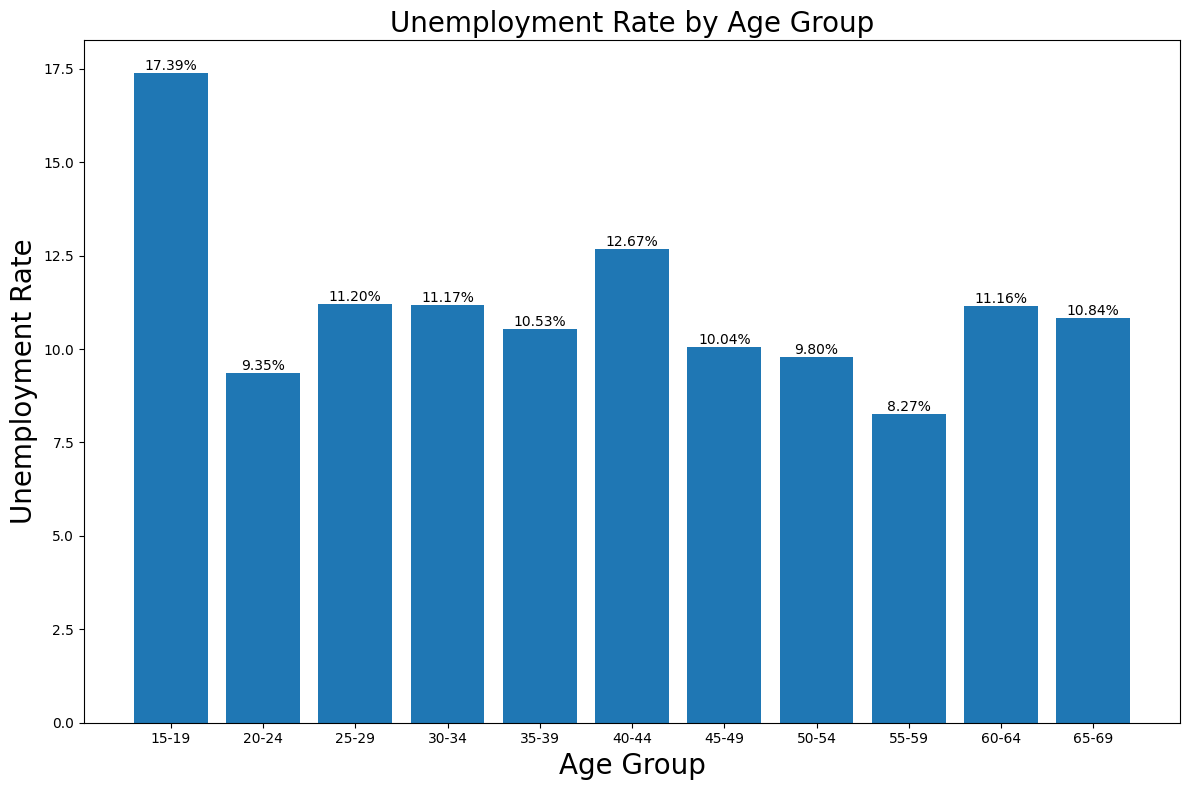

In [70]:
# Visualise unemployment rate by age group
# Plotting Unemployment rate across age groups
plt.figure(figsize=(12, 8))
plot5 = plt.bar(df_sorted["age_group"], df_sorted["unemployment_rate"])
# Annotate each bar with the count
#for bar in plot4:
 #   yval = bar.get_height()
  #  plt.text(bar.get_x() + bar.get_width()/2, yval + 0, yval, ha='center', va='bottom')

for bar in plot5:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Unemployment Rate by Age Group', size = 20)
plt.xlabel('Age Group', size = 20)
plt.ylabel('Unemployment Rate', size = 20)
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Unemployment Rate by Age Group.png')

# show plot
plt.show()

In [71]:
# Write a list of keywords to use to filter jobs whose employees are highly likely to commute
keywords_list = ['professor', 'librarian', 'accountant', 'administrator', 'executive', 'director', 'nurse', 'engineer', 'consultant',
                'broker', 'pilot', 'cabin crew', 'armed forces', 'banker', 'barrister', 'radiographer', 'ranger', 'research', 
                'sales', 'scientist', 'trader', 'journalist', 'presenter', 'surveyor', 'operator', 'manager', 'treasurer', 'dentist',
                'lecturer', 'logistics', 'financial', 'marketing', 'strategy', 'technology', 'chief of staff', 'psychotherapist', 'IT',
                'insurance', 'manufacturing', 'marketing', 'medical', 'secretary', 'navy', 'hospital', 'prison', 'clinical']

keywords_pattern = '|'.join(keywords_list) # joins the keywords by pipes

# Use the joined string as your filter pattern with case-insensitive search
keyword_filter = df['Occupation'].str.contains(keywords_pattern, case=False, na=False)

# Apply the filter to the data frame and then take the first 100 entries
specific_jobs = df[keyword_filter]
commuters = specific_jobs[(specific_jobs['Occupation Category'] != 'University/PhD Student') & (specific_jobs['Occupation Category'] != 'Retired')]
commuters

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup,Occupation Category
2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Professor Emeritus,NaN,Christian,55-59,Employed
3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,"Engineer, control and instrumentation",NaN,Christian,50-54,Employed
5,5,Gray Centers,Anna,Edwards,62,Head,Single,Female,"Civil engineer, consulting",NaN,Christian,60-64,Employed
9,8,Gray Centers,Maurice,Hussain,29,Head,Single,Male,"Engineer, materials",NaN,Catholic,25-29,Employed
10,1,Bletchleyrow Street,Barry,Miah,45,Head,Married,Male,Diagnostic radiographer,NaN,Catholic,45-49,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,1,Baker Spire,Duncan,Nicholson,47,Head,Single,Male,Fast food restaurant manager,NaN,Catholic,45-49,Employed
10061,1,St.Matthew Manorhouse,Rosemary,Bird,47,Head,Single,Female,"Presenter, broadcasting",NaN,Undecided,45-49,Employed
10062,1,St.Matthew Manorhouse,Glen,Stevenson,51,Partner,Single,Male,Passenger transport manager,NaN,Undecided,50-54,Employed
10065,1,St.Matthew Manorhouse,Steven,Bird,24,Son,Single,Male,Data scientist,NaN,Undecided,20-24,Employed


In [72]:
# Percentage of estimated commuters in the "Employed' category.
# Number of estimated commuters
num_of_commuters = commuters.shape[0]

# Total number of employed people in the town
total_num_of_employees = df[df['Occupation Category'] == 'Employed'].shape[0]

# Percentage of employed people estimated to hold jobs that require commuting
percentage = (num_of_commuters/total_num_of_employees) * 100

# Print the output
print(f"Number of Estimated Commuters: {num_of_commuters} Persons")
print(f"Percentage of employed people estimated to hold jobs that require commuting: {percentage:.2f}%")

Number of Estimated Commuters: 3034 Persons
Percentage of employed people estimated to hold jobs that require commuting: 57.40%


In [73]:
# Total Number of Commuters
# Total Population
total_population = df.shape[0]

# Number of University Students
num_of_university_students = df[df['Occupation'] == 'University Student'].shape[0]

# Number of PhD Students
num_of_PhD_students = df[df['Occupation'] == 'PhD Student'].shape[0]

# Total number of commuters
total_commuters = num_of_commuters + num_of_university_students + num_of_PhD_students

# Percentage of commuters in the town
percent_commuters = (total_commuters/total_population) * 100

# Print the output
print('University Students:', num_of_university_students)
print('PhD Students:', num_of_PhD_students)
print(f"Total Number of Commuters: {total_commuters} Persons")
print(f"Percentage of commuters in the town: {percent_commuters:.2f}%")

University Students: 648
PhD Students: 22
Total Number of Commuters: 3704 Persons
Percentage of commuters in the town: 36.74%


In [74]:
# Total population
total_population = df.shape[0]

# Obtain the Number retirees aged 65 and above. There are no retirees aged below 68 though.
retired_65_up = df[(df['Occupation Category'] == 'Retired') & (df['Age'] >= 65)].shape[0]

# Percentage of retirees aged sixty five and above as fraction of the total population
sixty_five_plus_percent = (retired_65_up/total_population) * 100
print(f'The percentage of retired people in the town is: {sixty_five_plus_percent:.2f}%')

The percentage of retired people in the town is: 7.47%


In [75]:
# Grouping Retired people by Age Group. This will enable us to create a visual representation.
retirees = df[(df['Occupation Category'] == 'Retired') & (df['Age'] >= 65)].groupby('AgeGroup', observed=True).size().reset_index(name='Number of People')
retirees = retirees[retirees['Number of People'] > 0]
retirees

,AgeGroup,Number of People
0,65-69,106
1,70-74,251
2,75-79,159
3,80-84,123
4,85-89,67
5,90-94,20
6,95-99,10
7,100+,17


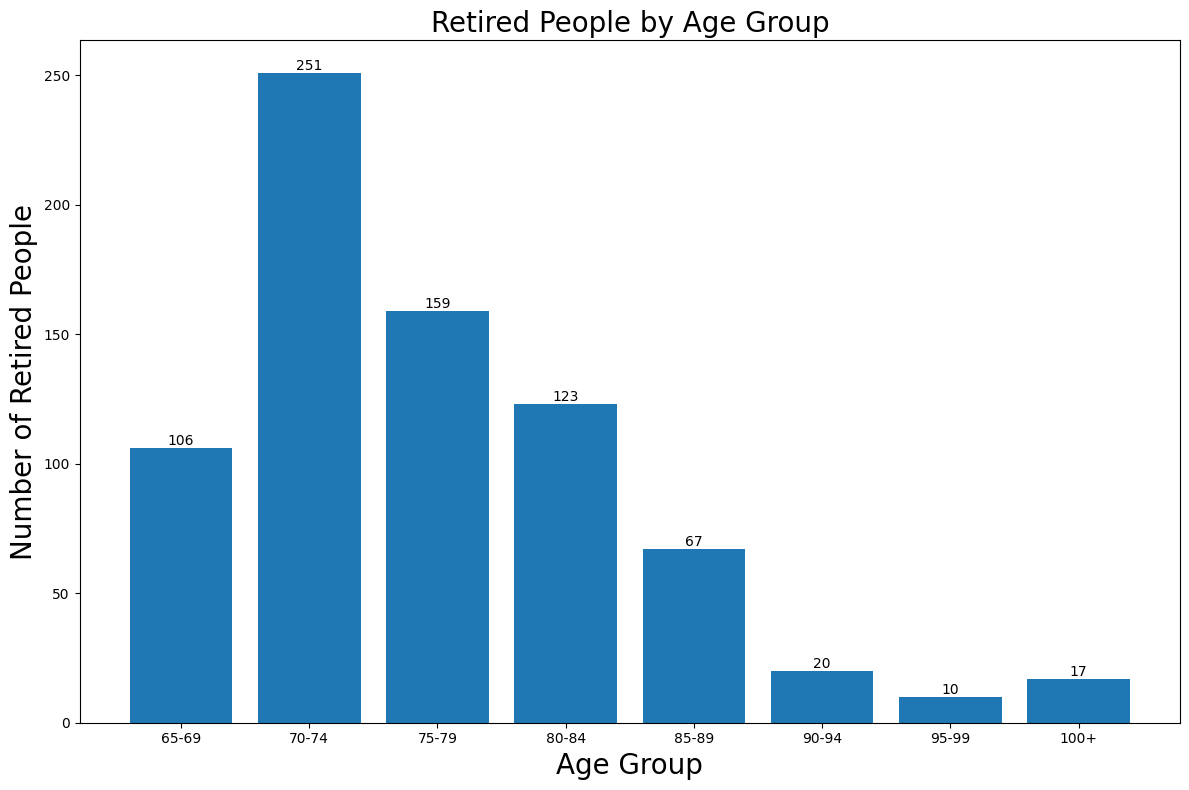

In [76]:
# Plotting Number of retired people by age group
plt.figure(figsize=(12, 8))
plot3 = plt.bar(retirees["AgeGroup"], retirees["Number of People"])

# Annotate each bar with the count
for bar in plot3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0, yval, ha='center', va='bottom')

# Add title and labels to the plot
plt.title('Retired People by Age Group', size = 20)
plt.xlabel('Age Group', size = 20)
plt.ylabel('Number of Retired People', size = 20)
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Retired People by Age Group.png')

# Show the plot
plt.show()